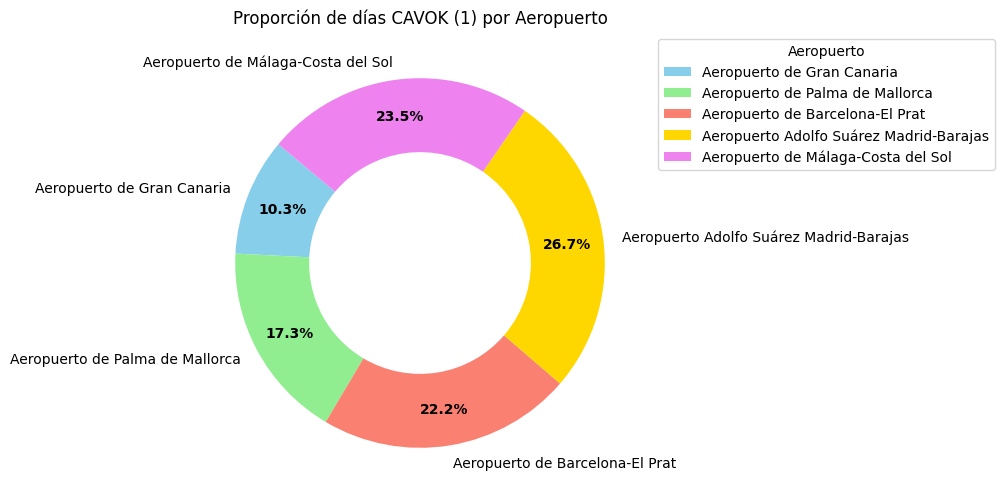

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Nombres de los archivos y aeropuertos con nombres completos para la leyenda
files = {
    'GCLP': 'GCLP_All.csv',
    'LEPA': 'LEPA_All.csv',
    'LEBL': 'LEBL_All.csv',
    'LEMD': 'LEMD_All.csv',
    'LEMG': 'LEMG_All.csv'
}

airport_names = {
    'GCLP': 'Aeropuerto de Gran Canaria',
    'LEPA': 'Aeropuerto de Palma de Mallorca',
    'LEBL': 'Aeropuerto de Barcelona-El Prat',
    'LEMD': 'Aeropuerto Adolfo Suárez Madrid-Barajas',
    'LEMG': 'Aeropuerto de Málaga-Costa del Sol'
}

# Colores para cada aeropuerto
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet']

# Lista para almacenar el conteo de días CAVOK por aeropuerto
cavok_days = []

# Iterar sobre cada archivo
for airport_code, file_name in files.items():
    # Cargar los datos
    data = pd.read_csv(file_name, low_memory=False)
    
    # Convertir la columna dateTime a tipo datetime para extraer la fecha (sin tiempo)
    data['dateTime'] = pd.to_datetime(data['dateTime']).dt.date

    # Extraer el mes y el año para agrupar por ellos
    data['Month'] = pd.to_datetime(data['dateTime']).dt.month
    data['Year'] = pd.to_datetime(data['dateTime']).dt.year

    # Suponiendo que la columna CAVOK indica 1 si el día fue CAVOK y 0 de lo contrario
    data['CAVOK'] = data['CAVOK'].fillna(0).astype(int)
    daily_cavok = data.groupby(['Year', 'Month', 'dateTime'])['CAVOK'].max().reset_index()

    # Agrupar por año y mes para contar los días CAVOK
    total_cavok_days = daily_cavok['CAVOK'].sum()

    # Añadir al resultado
    cavok_days.append(total_cavok_days)

# Crear un gráfico de donut
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(cavok_days, labels=list(airport_names.values()), colors=colors,
                                  autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4),
                                  pctdistance=0.8)

# Añadir títulos y configuración
plt.title('Proporción de días CAVOK (1) por Aeropuerto')
plt.setp(autotexts, size=10, weight="bold", color="black")

# Añadir leyenda
plt.legend(wedges, list(airport_names.values()), title="Aeropuerto", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()
